In [12]:
%matplotlib inline

import os
import sys
SYS_PATH = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(SYS_PATH + '/' + 'src/supporters')
from volumetric_exploration import  *
from image_file_processing import show_sitk_img_info

# import ants
import SimpleITK as sitk

# print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

SimpleITK version = 2.3.0


In [8]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = c:\Users\CYBER\VascuIAR


In [9]:
raw_img_path = os.path.join(BASE_DIR, 'src', 'assets', 'raw_examples', 'la_010.nii')
print(f'raw_img_path = {raw_img_path}')

raw_img_path = c:\Users\CYBER\VascuIAR\src\assets\raw_examples\la_010.nii


In [4]:
raw_img_ants = ants.image_read(raw_img_path)
print(raw_img_ants)

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (320, 320, 120)
	 Spacing    : (1.25, 1.25, 1.37)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]



- LPI = Left-to-right, Posterior-to-anterior, Inferior-to-superior
- IAL = Inferior-to-superior, Anterior-to-posterior, Left-to-right

In [8]:
print(raw_img_ants.get_orientation())

LPI


In [7]:
# Pixel arrangement
# Z, Y, X = (↑,↓,→)

arr = raw_img_ants.numpy()
print(raw_img_ants.get_orientation())
print(arr.shape, '-> (Z,Y,X)')

LPI
(320, 320, 120) -> (Z,Y,X)


In [5]:
raw_img_ants_arr = raw_img_ants.numpy()

print(f'type = {type(raw_img_ants_arr)}')
print(f'shape = {raw_img_ants_arr.shape}')

type = <class 'numpy.ndarray'>
shape = (320, 320, 120)


In [9]:
img = ants.image_read(raw_img_path, reorient='IAL')
print(img.get_orientation())
print(arr.shape, '-> (Z,Y,X)')
explore_3D_array(arr=img.numpy()) 

IAL
(320, 320, 120) -> (Z,Y,X)


interactive(children=(IntSlider(value=59, description='SLICE', max=119), Output()), _dom_classes=('widget-inte…

In [10]:
img = ants.image_read(raw_img_path, reorient='SPL')
print(img.get_orientation())
print(arr.shape, '-> (Z,Y,X)')
explore_3D_array(arr=img.numpy()) 

SPL
(320, 320, 120) -> (Z,Y,X)


interactive(children=(IntSlider(value=59, description='SLICE', max=119), Output()), _dom_classes=('widget-inte…

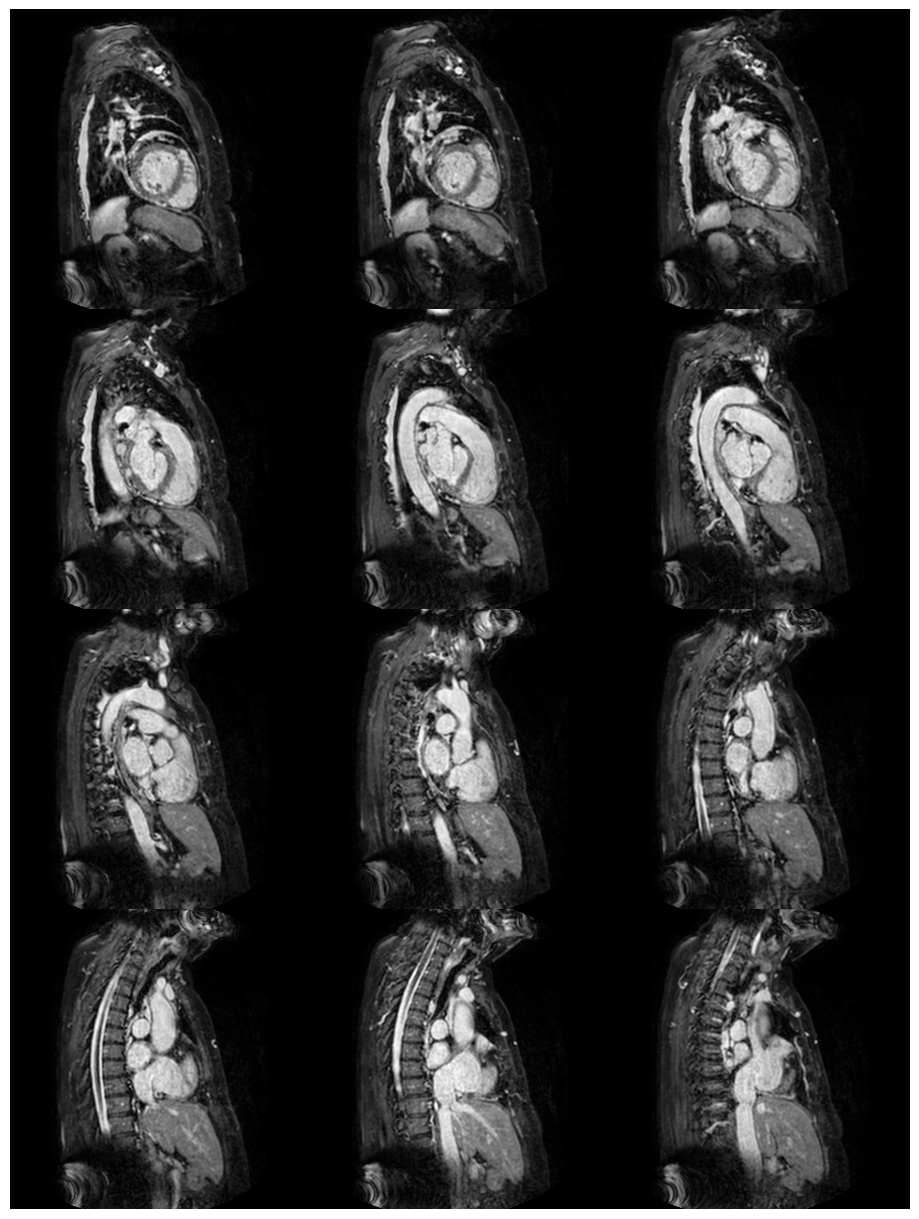

In [6]:
ants.plot(raw_img_ants, figsize=3, axis=2)

In [7]:
explore_3D_array(raw_img_ants_arr)

e:\ISEF\VascuIAR\.venv\lib\site-packages\ipywidgets\widgets\interaction.py:43: DeprecationWarning:

`ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`



interactive(children=(IntSlider(value=159, description='SLICE', max=319), Output()), _dom_classes=('widget-int…

For AntsPy:

- Internal axis are (Z,Y,X). It means, when we get numpy array dimensions are (Z,Y,X)
- When we define orientation, orientation string is according to internal axis.


For SimpleITK:

- Internal axis are (X,Y,Z). It means, when we get numpy array dimensions are (Z,Y,X) i.e. shifted.
- When we define orientation, orientation string is according to internal axis.
- The orientation string is set with the latest letter, e.g. :
    - "RPS" = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)
    - "PSR" = (anterior-to-Posterior, inferior-to-Superior, left-to-Right)

In [11]:
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)
print(raw_img_sitk)

Image (0000026F6F5D17A0)
  RTTI typeinfo:   class itk::Image<float,3>
  Reference Count: 1
  Modified Time: 2003
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1978
  UpdateMTime: 1999
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [320, 320, 120]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [320, 320, 120]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [320, 320, 120]
  Spacing: [1.25, 1.25, 1.37]
  Origin: [0, 0, 0]
  Direction: 
-1 0 0
0 -1 0
0 0 1

  IndexToPointMatrix: 
-1.25 0 0
0 -1.25 0
0 0 1.37

  PointToIndexMatrix: 
-0.8 0 0
0 -0.8 0
0 0 0.729927

  Inverse Direction: 
-1 0 0
0 -1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0000026F6FA78DE0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,float>
      Referenc

In [13]:
show_sitk_img_info(raw_img_sitk)

 Pixel Type : 32-bit float
 Dimensions : (320, 320, 120)
 Spacing : (1.25, 1.25, 1.3700000047683716)
 Origin : (0.0, 0.0, 0.0)
 Direction : (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)


In [14]:
raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)

print(f'type = {type(raw_img_sitk_arr)}')
print(f'shape = {raw_img_sitk_arr.shape}')

type = <class 'numpy.ndarray'>
shape = (120, 320, 320)


In [15]:
explore_3D_array(raw_img_sitk_arr)

interactive(children=(IntSlider(value=59, description='SLICE', max=119), Output()), _dom_classes=('widget-inte…

In [16]:
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)
raw_img_sitk = sitk.DICOMOrient(raw_img_sitk,'PSR')

raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)
print(raw_img_sitk_arr.shape)
explore_3D_array(raw_img_sitk_arr)

(320, 120, 320)


interactive(children=(IntSlider(value=159, description='SLICE', max=319), Output()), _dom_classes=('widget-int…